In [24]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations as get_combi
import random

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from tqdm import tqdm

In [2]:
def cartesian(arrays, out=None):
    """
    Source: https://stackoverflow.com/a/1235363
    Generate a Cartesian product of input arrays.

    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the Cartesian product of.
    out : ndarray
        Array to place the Cartesian product in.

    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing Cartesian products
        formed of input arrays.

    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])

    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    #m = n / arrays[0].size
    m = int(n / arrays[0].size)
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m, 1:])
        for j in range(1, arrays[0].size):
        #for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m, 1:] = out[0:m, 1:]
    return out

<AxesSubplot:>

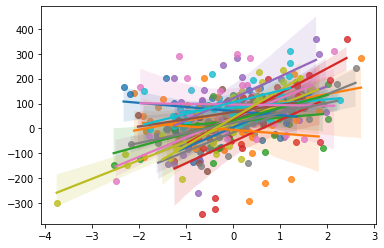

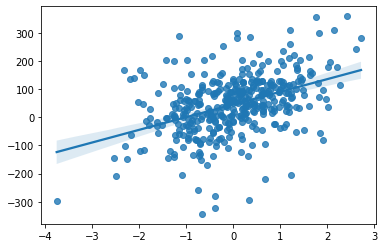

In [3]:
meaningful_groups = {"g1": [range(5)], "g2": [range(4)]}
dummy_groups = {f"d{i}": [0,1] for i in range(20)}

n_features = 3
n_samples_per_group = 20
combinations = cartesian([v for v in meaningful_groups.values()])
X_list = []
y_list = []
for c in combinations:
    X, y = make_regression(n_samples=n_samples_per_group, n_features=n_features, noise=0.3)
    y +=  np.random.random() * 100
    X_list.append(X)
    y_list.append(y)
    sns.regplot(x=X[:,0], y=y)

X_features = np.concatenate(X_list, axis=0)
X_groups = np.repeat(combinations, n_samples_per_group, axis=0)

X = np.concatenate([X_features, X_groups], axis=1)

y = np.concatenate(y_list)

plt.figure()
sns.regplot(x=X[:,0], y=y)

In [4]:
df_X = pd.DataFrame(X, columns=[f"f{i}" for i in range(n_features)] + list(meaningful_groups.keys()))
df = df_X.copy()

for dum in [f"g{no}" for no in range(3,21)]:
    df[dum] = np.random.randint(0, 2, size=len(df))
    
df["y"] = y
df.head()

c = df.filter(regex="g").columns
df[c] = df[c].astype(int)
df

,f0,f1,f2,g1,g2,g3,g4,g5,g6,g7,...,g12,g13,g14,g15,g16,g17,g18,g19,g20,y
0,0.899054,-1.900944,-0.892594,0,0,0,0,1,1,1,...,0,0,1,0,0,1,0,0,0,-22.209417
1,0.260476,0.416111,-0.446851,0,0,0,1,1,1,1,...,0,0,1,1,1,0,1,0,0,36.005656
2,-1.071510,0.673319,-0.003798,0,0,1,1,0,1,0,...,1,1,1,1,1,1,0,1,1,-63.267230
3,1.120265,-0.757333,0.156017,0,0,1,1,1,1,1,...,0,0,1,0,0,1,1,0,0,86.343368
4,1.459511,-1.012402,1.039606,0,0,1,0,0,1,1,...,0,0,1,0,0,1,0,1,0,137.047132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.895379,-0.924681,2.183375,4,3,1,1,0,1,0,...,0,1,0,1,0,1,1,1,0,151.683531
396,0.000570,0.362596,-0.499141,4,3,1,1,1,1,1,...,1,0,1,0,0,1,0,0,1,52.012884
397,-1.764645,0.376053,0.345919,4,3,1,1,1,1,1,...,1,1,0,1,0,1,1,0,0,-1.440873
398,1.212399,-0.983096,1.396837,4,3,0,0,1,1,0,...,1,0,0,1,1,0,0,1,1,311.264391


In [5]:
df_original = df.copy()

In [23]:
from itertools import combinations as get_combi

grouping_col = [i for i in df.columns if i.startswith('g')] 
combi = list(get_combi(grouping_col, 4))
random.shuffle(combi)
len(combi), combi[:5]

(4845,
 [('g5', 'g7', 'g12', 'g14'),
  ('g11', 'g16', 'g17', 'g19'),
  ('g1', 'g12', 'g16', 'g17'),
  ('g2', 'g7', 'g8', 'g11'),
  ('g1', 'g3', 'g14', 'g20')])

100%|█████████████████████████████████████████████████████████████████████████████| 4845/4845 [00:20<00:00, 234.20it/s]

('g1', 'g7', 'g12', 'g13') 3915.0369744895593


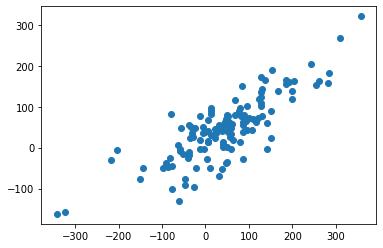

In [26]:
MSEs = []
scatter_prediction = {'y_test': [], 'y_pred': []}
for i in tqdm(range(len(combi))):
    
    col = [i for i in df.columns if i.startswith('f')] + list(combi[i])
    X, y = df[col], df.y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    pipe = Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression(fit_intercept=True))])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    MSEs.append(mse)
    
    if mse <= min(MSEs):
        scatter_prediction['y_test'] = y_test
        scatter_prediction['y_pred'] = y_pred
    
idx = MSEs.index(min(MSEs))
print(combi[idx], min(MSEs))
plt.scatter(scatter_prediction['y_test'], scatter_prediction['y_pred'])

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error as mse

In [27]:
df = df_original.copy()
col = [i for i in data.columns if i.startswith('f')] + list(combi[idx])
col

['f0', 'f1', 'f2', 'g1', 'g7', 'g12', 'g13']

In [29]:
X, y = df[col], df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train

,f0,f1,f2,g1,g7,g12,g13,y
258,0.071796,0.451705,0.404417,3,0,1,0,55.074407
177,-0.502017,-0.523369,0.215700,2,0,0,1,-7.888530
119,-1.406038,0.522883,0.745777,1,0,0,1,-0.869511
194,-0.148411,-0.414455,0.047973,2,0,1,0,79.502629
229,1.819425,0.792643,-0.355525,2,1,1,0,71.553396
...,...,...,...,...,...,...,...,...
71,-0.867370,-0.512892,0.884833,0,1,0,0,-20.764211
106,-0.825088,-0.404806,-0.730548,1,1,1,0,-43.091858
270,0.996815,-1.665165,-1.020477,3,1,1,0,97.861292
348,-0.531617,0.347402,1.334524,4,0,1,0,31.499135


In [41]:
md = sm.MixedLM.from_formula("y ~ f0 +f1+f2 + (0|g1)+(0|g7)+(0|g12)",
    df_train,
    re_formula = "~1 + f0+f1+f2",
    vc_formula= {'f0': '0 +C(f0)', 'f1': '0 +C(f1)', 'f2': '0 +C(f2)'},
    groups = df_train['g13']
)
mdf = md.fit()
print(mdf.summary())

C:\Users\htals\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\htals\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\htals\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\htals\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
C:\Users\htals\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base

              Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    y         
No. Observations:    268        Method:                REML      
No. Groups:          2          Scale:                 298.2677  
Min. group size:     130        Log-Likelihood:        -1451.3129
Max. group size:     138        Converged:             No        
Mean group size:     134.0                                       
-----------------------------------------------------------------
                Coef.      Std.Err.      z   P>|z|  [0.025 0.975]
-----------------------------------------------------------------
Intercept        21.104          8.302 2.542 0.011   4.832 37.376
f0               55.268          8.630 6.404 0.000  38.354 72.183
f1               45.654          6.613 6.904 0.000  32.693 58.616
f2               44.008          4.844 9.085 0.000  34.514 53.503
0 | g1           13.919          2.644 5.265 0.000   8.737 19.101
0 | g7            7.425 

In [42]:
y_pred = mdf.predict(X_test)

MSE:  3949.6628605931883


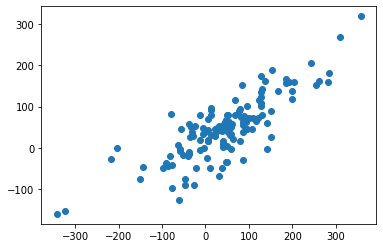

In [43]:
print("MSE: ", mse(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

In [108]:
# md = sm.MixedLM(
#     endog=df["y"], 
#     exog=df.filter(regex="f"), 
#     exog_re=df.filter(regex="g2"),
#     groups = df['g1']
# )
# mdf = md.fit()
# print(mdf.summary())